# SPINN (single) visualizations

In [ ]:
from setproctitle import setproctitle
setproctitle("SPINN (viz)")

In [ ]:
import os 

In [ ]:
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "2"

In [ ]:
epochs = 10000
log_iter = 1000

In [ ]:
import numpy as np 

In [ ]:
iterations = np.arange(0, epochs+1, log_iter)

In [ ]:
from cmspinn.spinn_jax_viz import spinn_cube

In [ ]:
# output_path = '/userhome/jeon_mg/workspace/_data/NOAA12673/PINN/20170904_000000'
# vmin = -3000
# vmax = 3000

# i_siz = 160
# j_siz = 100

# i_res = 15
# j_res = 15

In [ ]:
output_path = '/userhome/jeon_mg/workspace/_data/lowlou_64_64_64/SPINN'
vmin = -200
vmax = 200

i_siz = 32
j_siz = 32

i_res = 10
j_res = 10

In [ ]:
B_path = os.path.join(output_path, 'vtk')
os.makedirs(B_path, exist_ok=True)

## Save

In [ ]:
parameters_path = os.path.join(output_path, 'parameters.pickle')

In [ ]:
for epo in iterations:
    param_path = os.path.join(output_path, f"params_{epo}.pickle")
    vtk_path = os.path.join(B_path, f'B_spinn_{epo}.vtk')

    spinn = spinn_cube(param_path, parameters_path)
    spinn.calculate_magnetic_fields()
    spinn.grid.save(vtk_path)
    
    print(epo)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


## Plot

In [ ]:
import pyvista as pv
from cmspinn.mag_viz import mag_plotter

In [ ]:
pv.start_xvfb()
pv.global_theme.trame.server_proxy_enabled = True
pv.set_jupyter_backend('static')

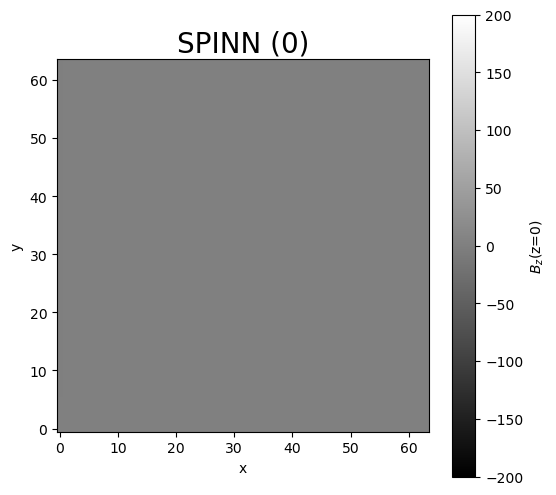

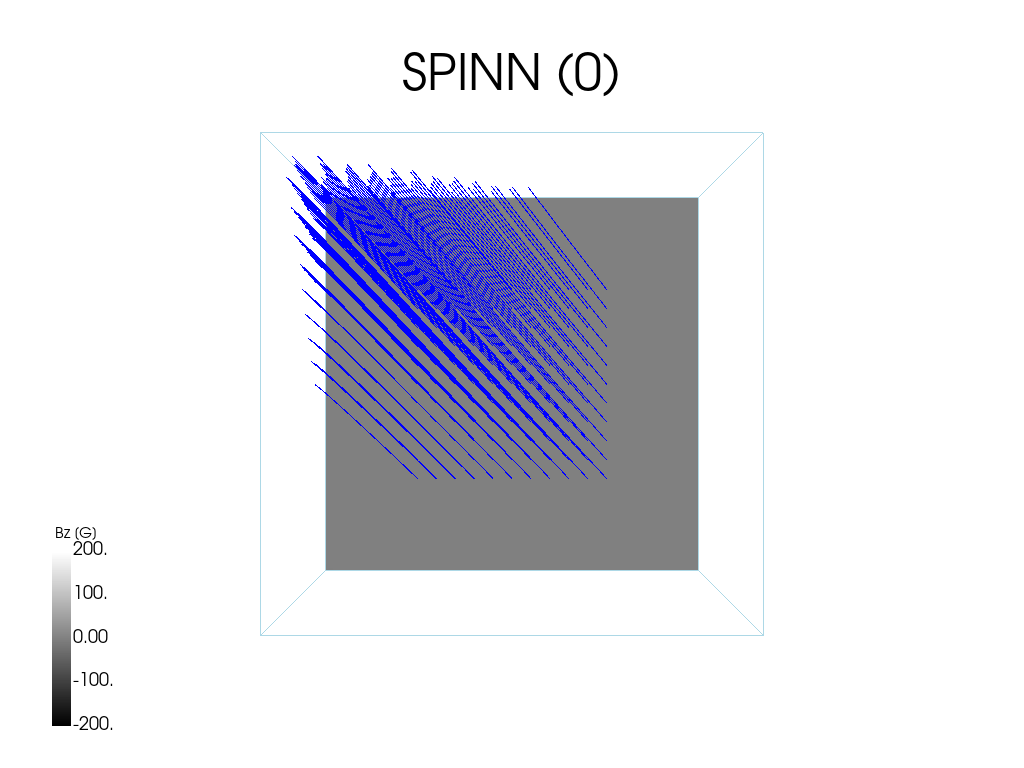

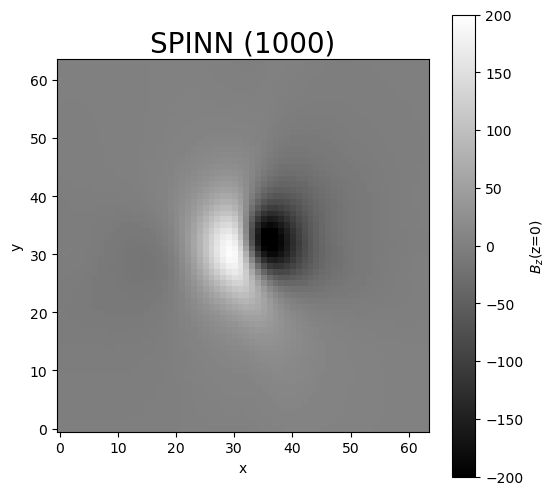

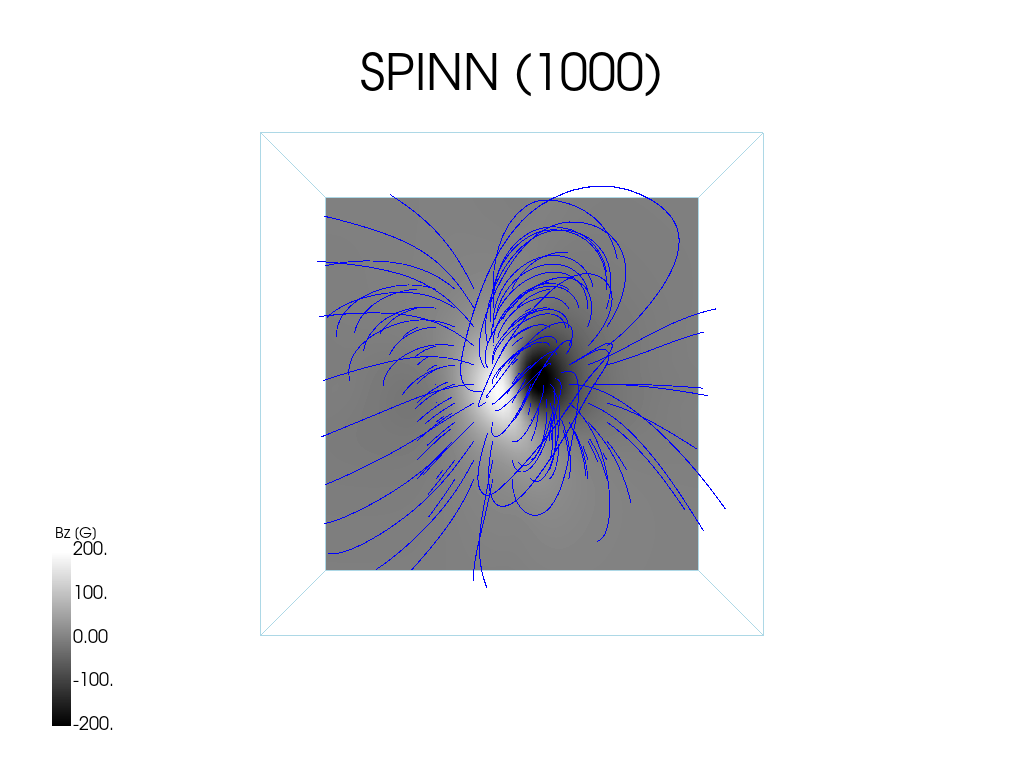

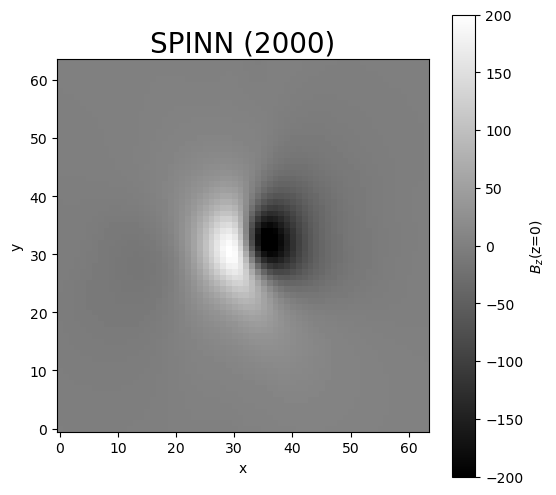

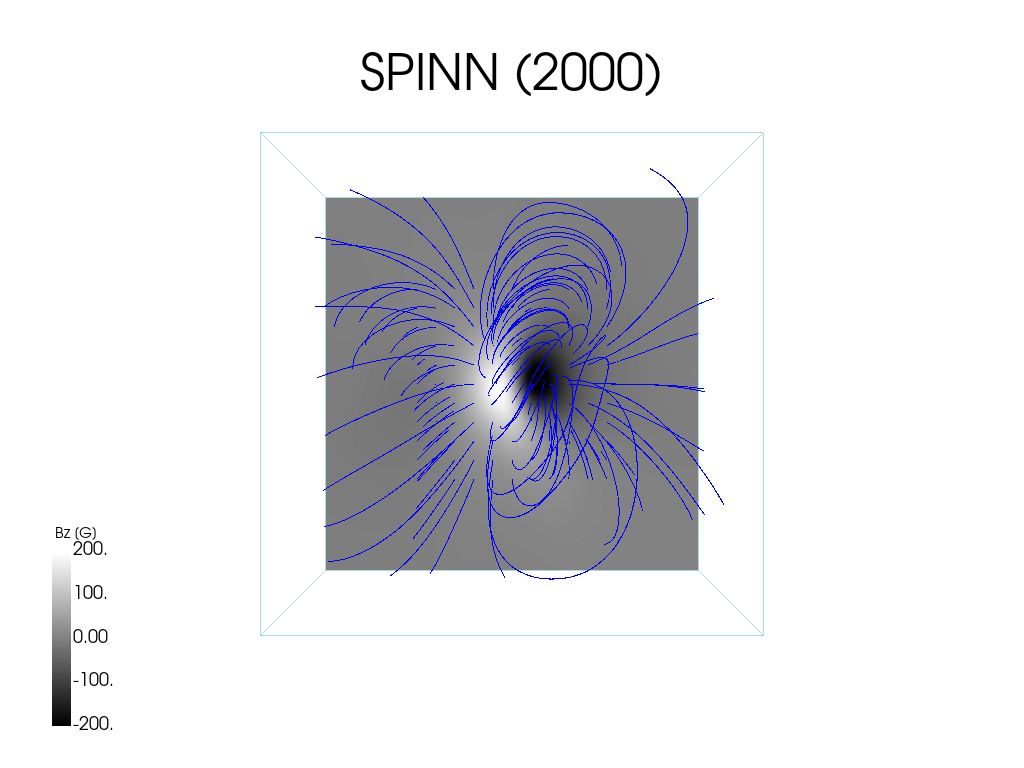

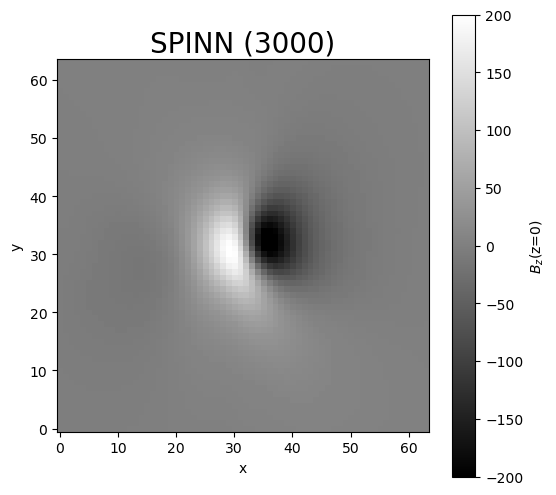

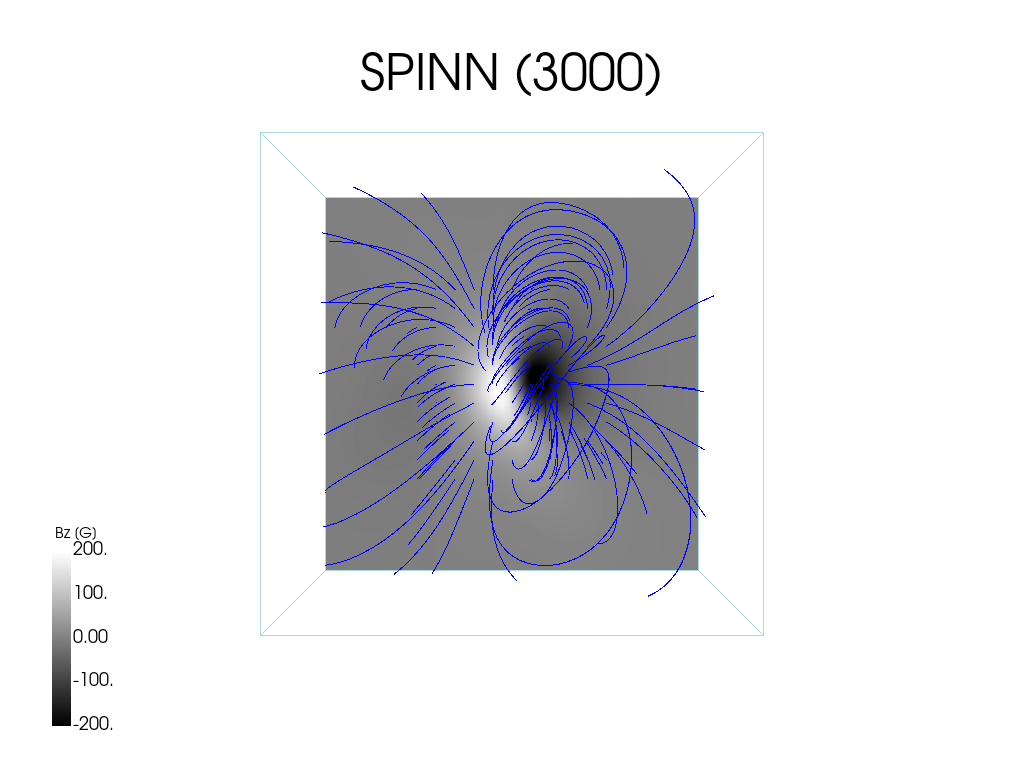

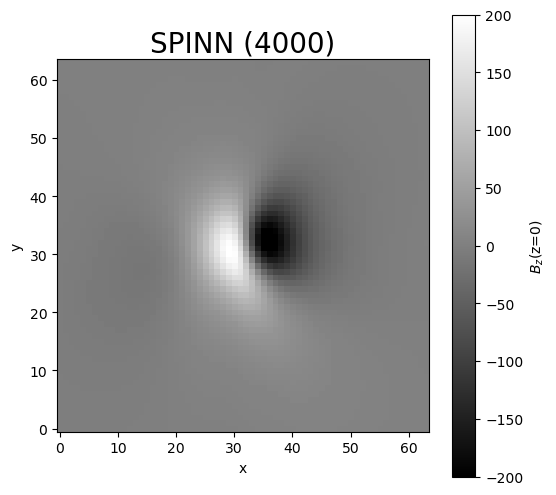

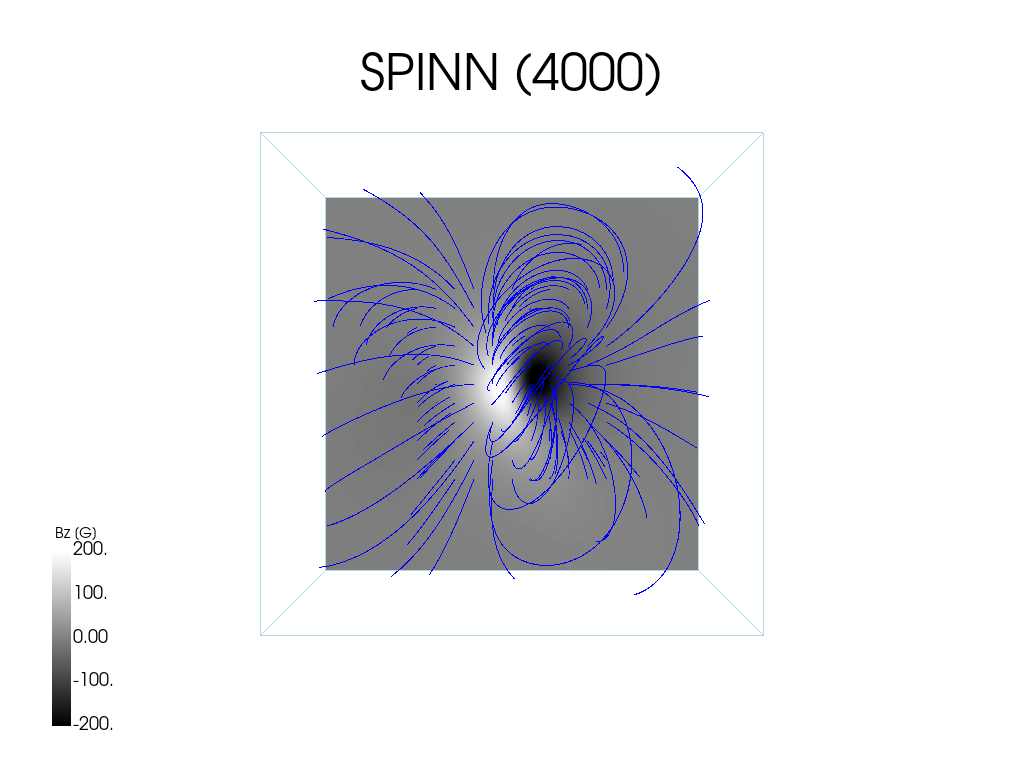

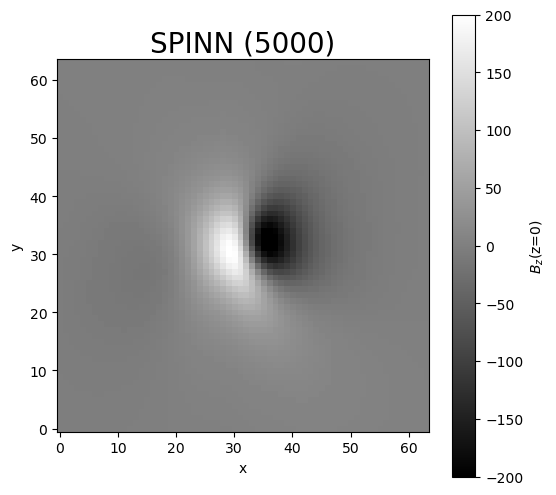

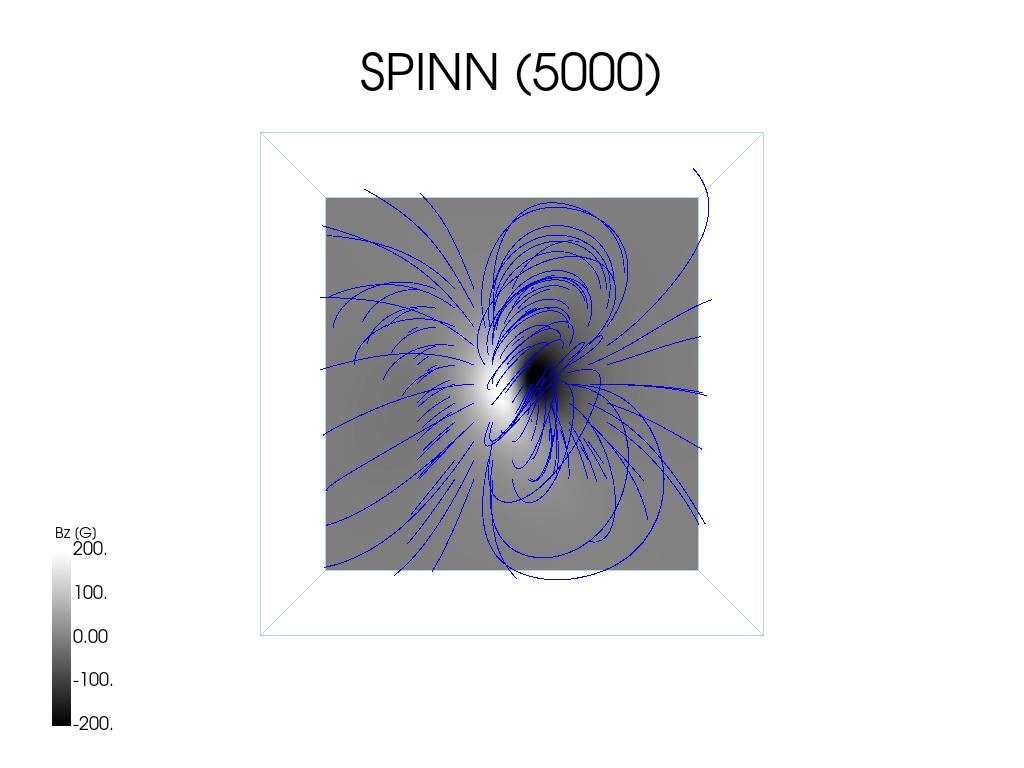

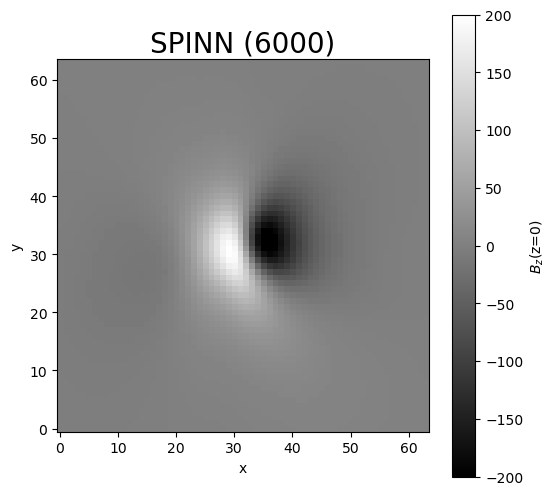

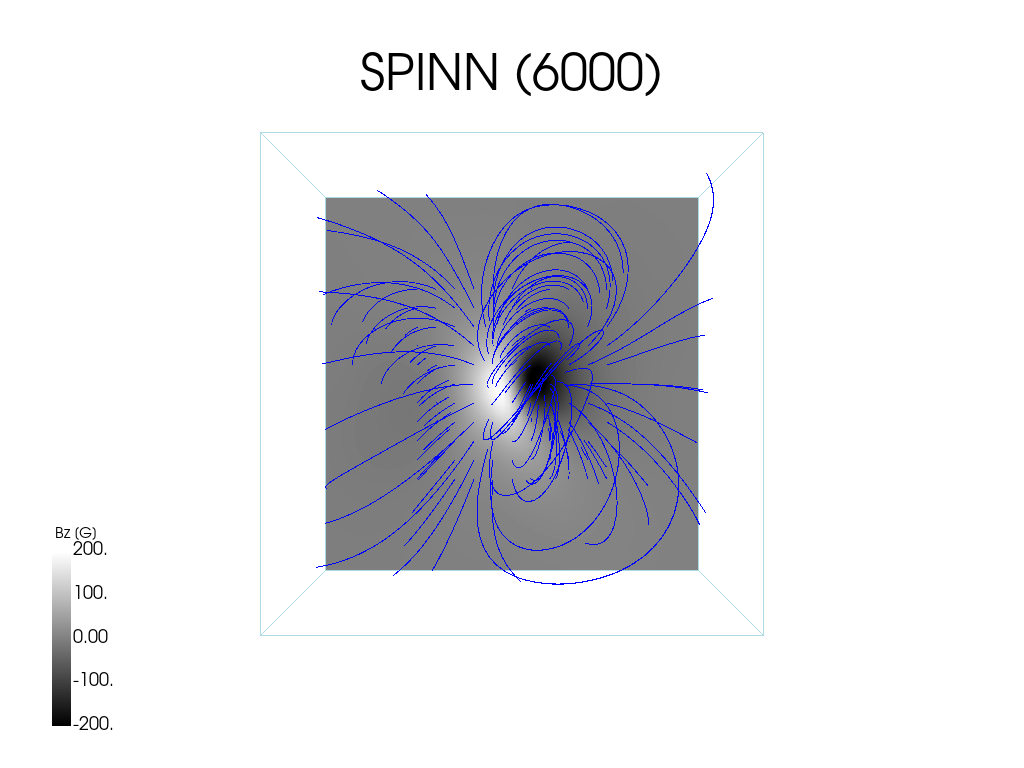

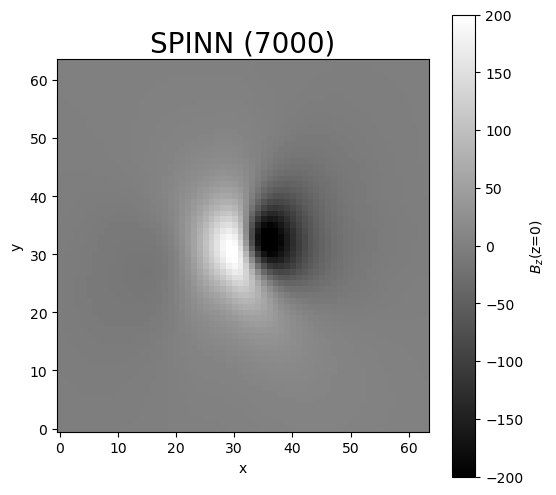

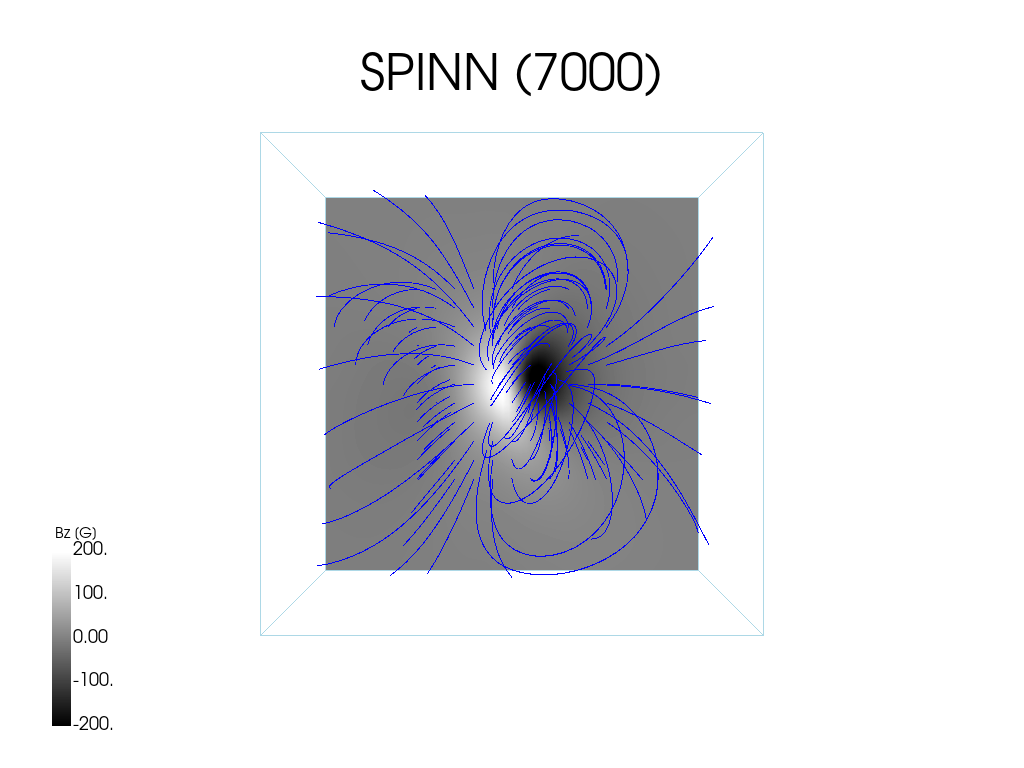

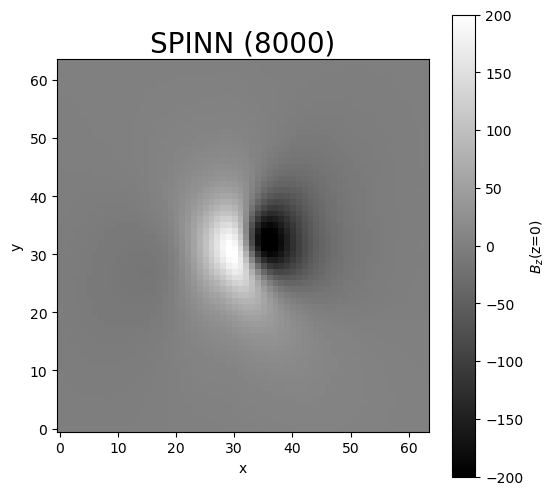

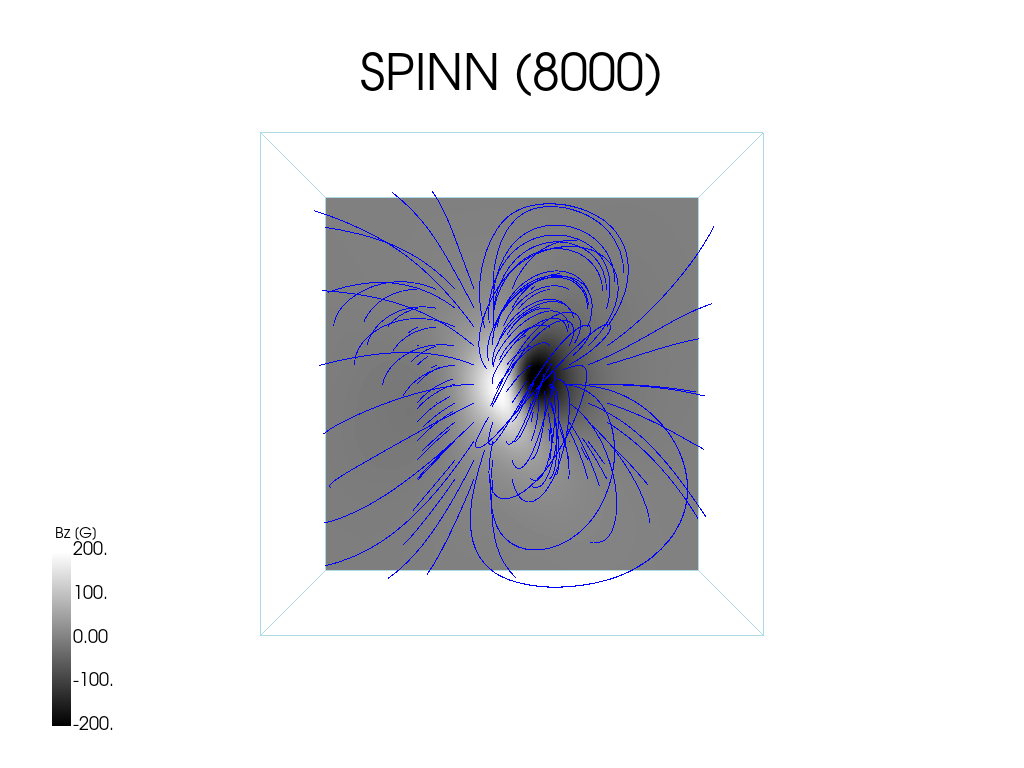

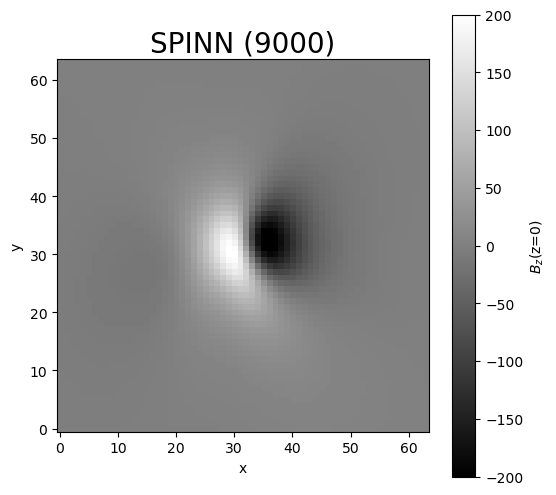

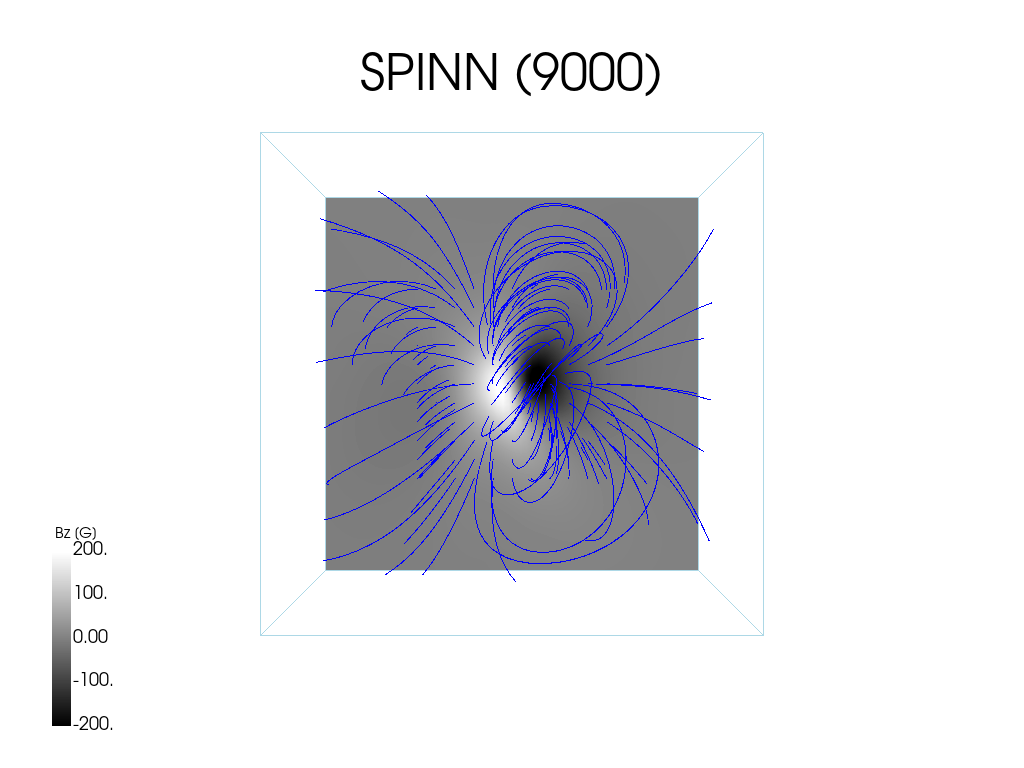

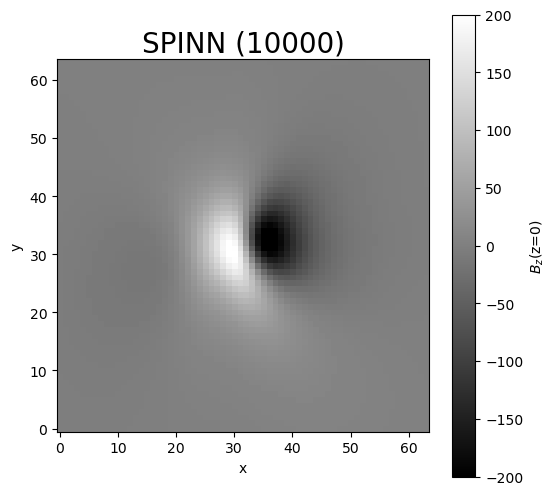

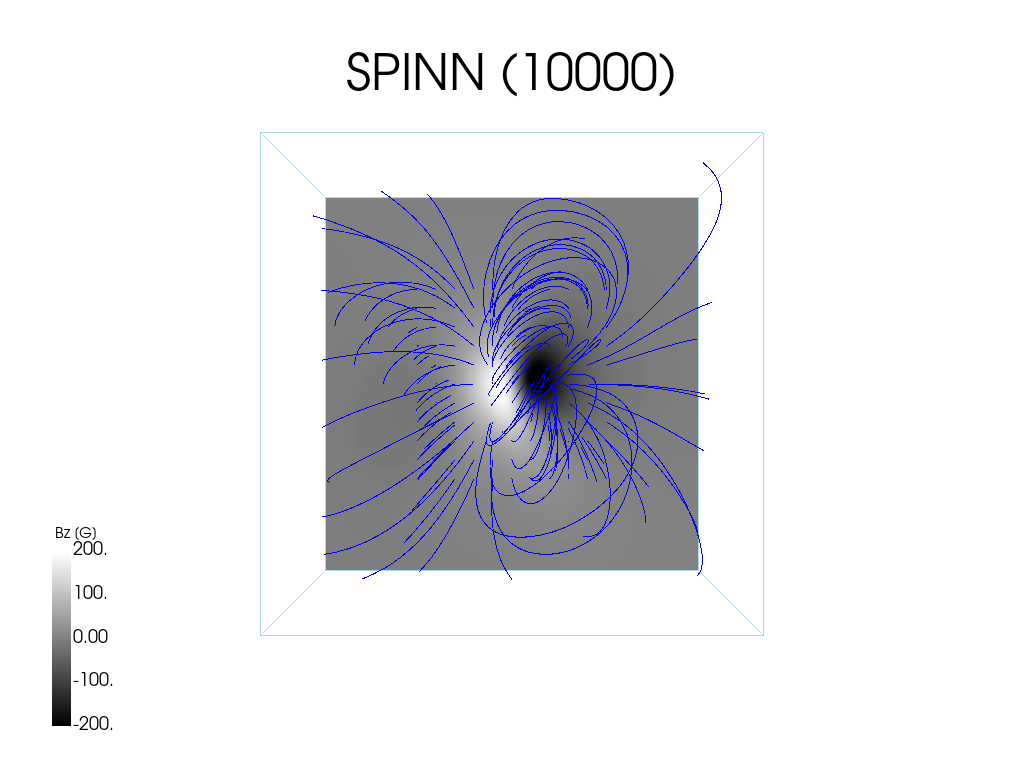

In [ ]:
for epo in iterations:
    B_spinn_vtk_path = os.path.join(B_path, f'B_spinn_{epo}.vtk')
    B_spinn_mesh = pv.read(B_spinn_vtk_path)
    B_spinn = mag_plotter(B_spinn_mesh)

    B_spinn.plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax, title=f"SPINN ({epo})")
    
    B_spinn.pv_streamline_Bz(window_size=None, title=f"SPINN ({epo})", title_fontsize=20, camera_position='xy', 
                             i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax)